# Day 23

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Dataset/Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# Fill missing values in all numeric columns of df with their mean
df.fillna(df.mean(numeric_only=True),inplace=True)
# To check for remaining missing values in numeric columns:
df.select_dtypes(include=np.number).isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [5]:
from sklearn.preprocessing import StandardScaler

# Prepare the 'Age' column by filling missing values
age_clean = df[['Age']].copy()
age_clean['Age'].fillna(age_clean['Age'].mean(), inplace=True)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform
scaled_data = scaler.fit_transform(age_clean)

# Convert back to DataFrame 
scaled_df = pd.DataFrame(scaled_data, columns=age_clean.columns)
scaled_df.shape

(891, 1)

In [8]:
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max Normalization to the 'Age' column
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(age_clean)

# Convert back to DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=age_clean.columns)

# View results
normalized_df.head()

,Age
0,0.271174
1,0.472229
2,0.321438
3,0.434531
4,0.434531


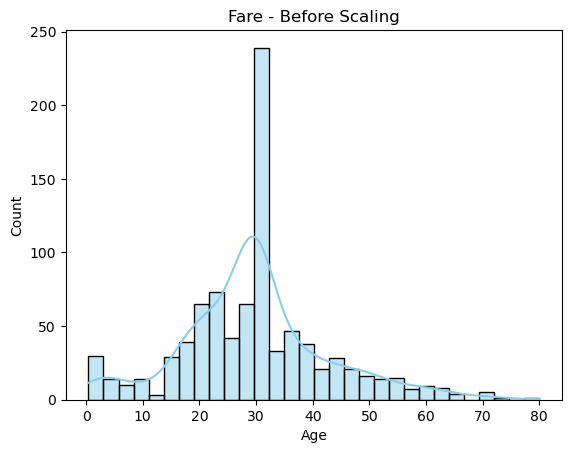

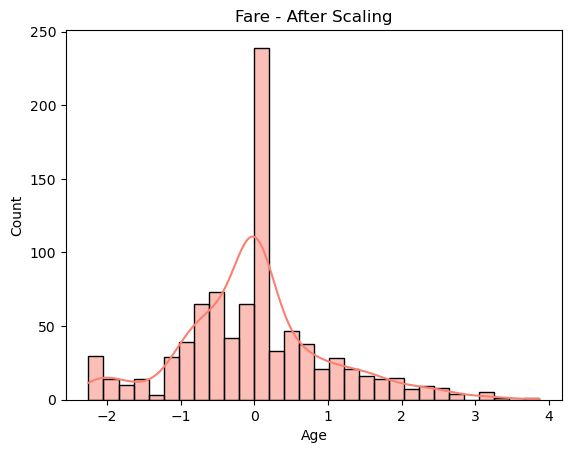

In [6]:
sns.histplot(age_clean['Age'], kde=True, color='skyblue')
plt.title("Fare - Before Scaling")
plt.show()

sns.histplot(scaled_df['Age'], kde=True, color='salmon')
plt.title("Fare - After Scaling")
plt.show()

In [9]:
scaled_df['Age'].mean()

2.2329064647904385e-16

In [10]:
# Detect outliers using IQR
Q1 = age_clean['Age'].quantile(0.25)
Q3 = age_clean['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
age_clean = age_clean[(age_clean['Age'] >= lower_bound) & (age_clean['Age'] <= upper_bound)]
age_clean.sample(5)

,Age
281,28.0
200,28.0
866,27.0
448,5.0
753,23.0


In [11]:
scaled_df['Age'].mean()

2.2329064647904385e-16

In [12]:
scaled_df['Age'].std()

1.0005616400330466

In [13]:
from sklearn.preprocessing import Binarizer

#Drop missing age values
df_age = df[['Age']].dropna().copy()

#Binarize age: 1 if age > 18 (adult), else 0 (child)
binarizer = Binarizer(threshold=18)
df_age['is_adult'] = binarizer.fit_transform(df_age)
print(df_age.head())

    Age  is_adult
0  22.0       1.0
1  38.0       1.0
2  26.0       1.0
3  35.0       1.0
4  35.0       1.0


In [17]:
from sklearn.preprocessing import RobustScaler

# Select only numeric columns for scaling
num_cols = df.select_dtypes(include=np.number)
print(num_cols.columns.tolist())

# Apply Robust Scaling
scaler = RobustScaler()
scaled_data = scaler.fit_transform(num_cols)

# Convert to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=num_cols.columns)

# Show before vs after for 'Fare'
print("\nBefore scaling - Fare stats:")
print(num_cols['Fare'].describe())

print("\nAfter Robust scaling - Fare stats:")
print(scaled_df['Fare'].describe())

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

Before scaling - Fare stats:
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

After Robust scaling - Fare stats:
count    891.000000
mean       0.768745
std        2.152200
min       -0.626005
25%       -0.283409
50%        0.000000
75%        0.716591
max       21.562738
Name: Fare, dtype: float64
